In [1]:
import pandas as pd # used to load individual files
import numpy as np # not currently used
import datetime as dt # not currently used
#from geopy.distance import geodesic might be used at some point
import matplotlib.pyplot as plt
import osmnx as ox # visualisation library for networks
%matplotlib inline
import pickle
import networkx as nx
import geopandas as gp

/opt/conda/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
'''
path = "gtfs_rejsekort.zip"

feed = pt.get_representative_feed(path)
# start and end are used to only select part of the data
start = 0*60*60  # 0:00
end = 24*60*60  # 24:00

G = pt.load_feed_as_graph(feed, start, end)
G_old = G.copy()

# Relabels nodes by removing WPDOS_ from each node
relabel_dic = {node:node[6:] for node in G.nodes()}
nx.relabel_nodes(G, relabel_dic, copy=False)

path2 = "rejsekort_graph_uncleaned.gpickle"
nx.write_gpickle(G,path2)
'''



In [3]:
with open("rejsekort_graph_uncleaned.gpickle", 'rb') as f:
    G = pickle.load(f)

/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


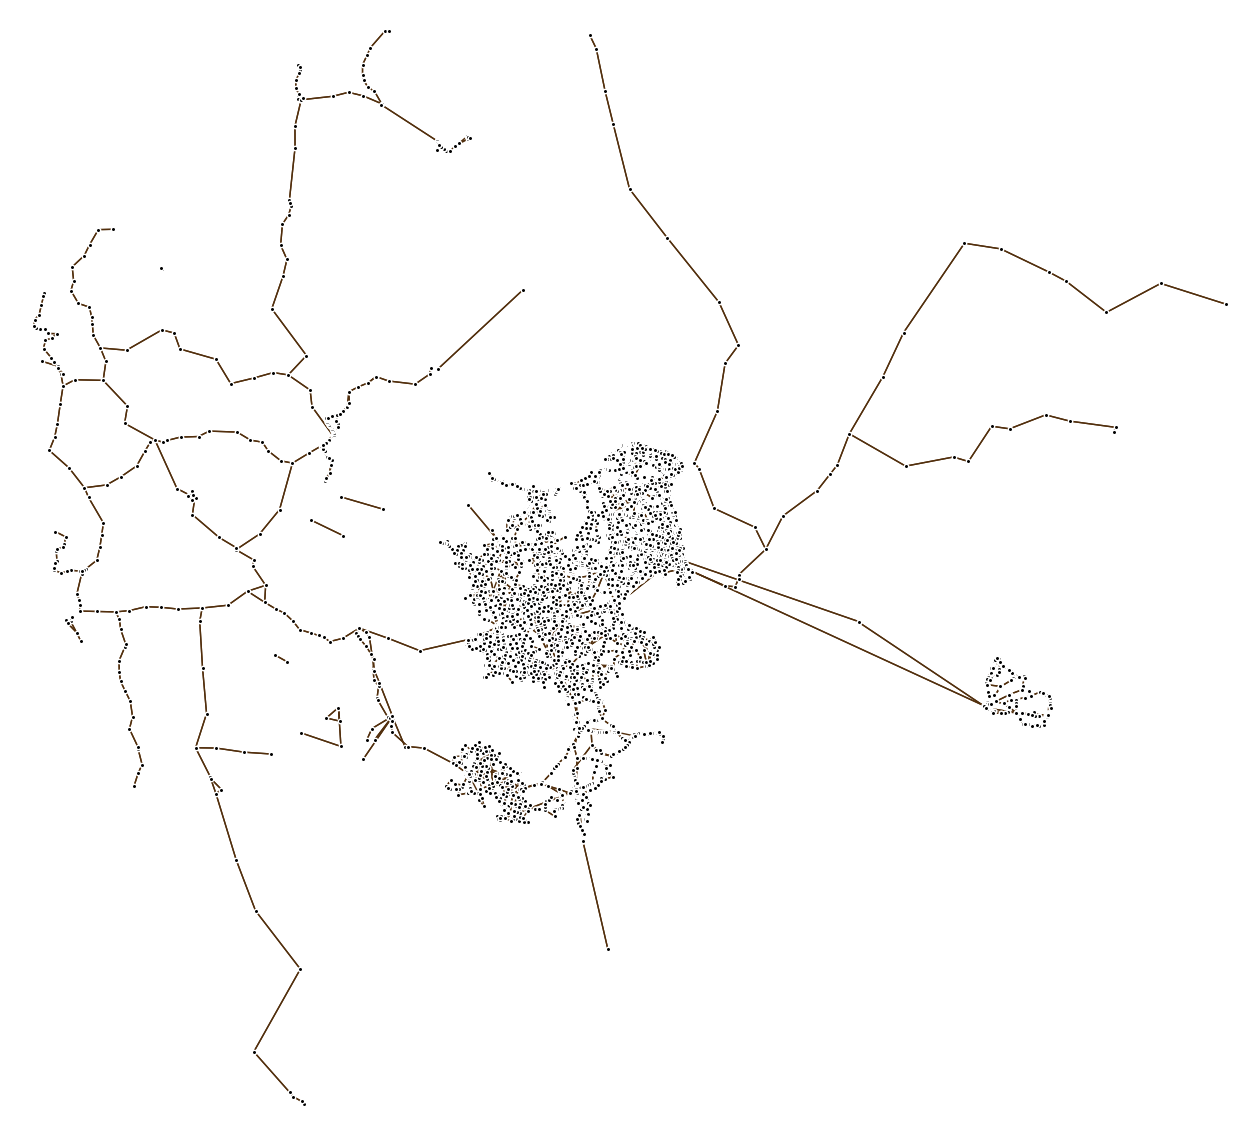

In [22]:
fig, ax = ox.plot_graph(G,
               figsize = (16,16),
                show=False,
                close=False,
                node_color='black',
                node_edgecolor="white",
                node_size=10,
                node_zorder=10,
                edge_color='#522F0D',
                edge_alpha=1,
                edge_linewidth = 1,
                bgcolor='None',
                #bbox= bbox_,
               #bgcolor='black'
              
             );

In [12]:
G.number_of_nodes()

38076

In [13]:
G.number_of_edges()

52031

In [21]:
G

In [20]:
type(G_1)

NoneType

In [14]:
nx.number_weakly_connected_components(G)

30

In [16]:
max(nx.weakly_connected_components(G), key=len)

{'O4LSS_000807041002',
 'O4LSS_000805200501',
 'O4LSS_000482354200',
 'O4LSS_000851004501',
 'O4LSS_000627753402',
 'O4LSS_000450394000',
 'O4LSS_000561142112',
 'O4LSS_000839200809',
 'O4LSS_000575608131',
 'O4LSS_000479443600',
 'O4LSS_000539000401',
 'O4LSS_000851280102',
 'O4LSS_000537002801',
 'O4LSS_000525000501',
 'O4LSS_000727201409',
 'O4LSS_000785000802',
 'O4LSS_000561141309',
 'O4LSS_000659000401',
 'O4LSS_000701601202',
 'O4LSS_000813007502',
 'O4LSS_000751481801',
 'O4LSS_000851910402',
 'O4LSS_000735000231',
 'O4LSS_000565902001',
 'O4LSS_000779008301',
 'O4LSS_000410192800',
 'O4LSS_000731621202',
 'O4LSS_000461101200',
 'O4LSS_000703001101',
 'O4LSS_000461074700',
 'O4LSS_000801050101',
 'O4LSS_000519001022',
 'O4LSS_000743032401',
 'O4LSS_000561045112',
 'O4LSS_000791003602',
 'O4LSS_000839200102',
 'O4LSS_000621370509',
 'O4LSS_000480829500',
 'O4LSS_000561069701',
 'O4LSS_000851971102',
 'O4LSS_000787010502',
 'O4LSS_000450394800',
 'O4LSS_000541003301',
 'O4LSS_000

In [15]:
for cc in nx.weakly_connected_components(G):
    print(cc)
    break

{'O4LSS_000000004257', 'O4LSS_000000001480', 'O4LSS_000000038441', 'O4LSS_000000030091', 'O4LSS_000000009799', 'O4LSS_000000001441', 'O4LSS_000000052409', 'O4LSS_000000038583', 'O4LSS_000000029911', 'O4LSS_000000028620', 'O4LSS_000000004394', 'O4LSS_000000052456', 'O4LSS_000000042190', 'O4LSS_000000038355', 'O4LSS_000000002391', 'O4LSS_000000001997', 'O4LSS_000000004448', 'O4LSS_000000038782', 'O4LSS_000000006006', 'O4LSS_000000004971', 'O4LSS_000000028329', 'O4LSS_000000008914', 'O4LSS_000000005769', 'O4LSS_000000009054', 'O4LSS_000000047229', 'O4LSS_000000039300', 'O4LSS_000000007811', 'O4LSS_000000001756', 'O4LSS_000000043584', 'O4LSS_000000010267', 'O4LSS_000000000368', 'O4LSS_000000039887', 'O4LSS_000000045999', 'O4LSS_000000041946', 'O4LSS_000000029867', 'O4LSS_000000028064', 'O4LSS_000000040790', 'O4LSS_000000040840', 'O4LSS_000000039325', 'O4LSS_000000044251', 'O4LSS_000000004495', 'O4LSS_000000000571', 'O4LSS_000000037008', 'O4LSS_000000000407', 'O4LSS_000000042680', 'O4LSS_00

In [19]:
G.nodes["O4LSS_000000000002"]

{'boarding_cost': 1135.7628596338277,
 'modes': ['3'],
 'y': 55.767248497366,
 'x': 12.498017540594}

In [24]:
uniqmodes= [G.nodes[node]["modes"] for node in G.nodes()]

In [72]:
nodes = [node for node in G.nodes()]

In [35]:
G.get_edge_data(nodes[2], nodes[3], default=None)

{0: {'length': 146.66666666666666, 'mode': 'transit'}}

### Read in and inspect GTFS csv files directly

In [112]:
stops =pd.read_csv('gtfs_rejsekort/stops.txt',dtype=str)
stop_times = pd.read_csv("gtfs_rejsekort/stop_times.txt",dtype=str)
trips = pd.read_csv("gtfs_rejsekort/trips.txt",dtype=str)


In [172]:
rkort = pd.read_csv("jan_aug2020.csv",dtype=str,encoding="ANSI")

In [173]:
# makes sure the numbers are in the same format as graph

rkort["StartStopPointNr"] = rkort["StartStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)
rkort["SlutStopPointNr"] = rkort["SlutStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)

In [92]:
print(stops["stop_name"].dtype)
print(stops["stop_lat"].dtype)
print(stops["stop_id"].dtype)

object
object
object


In [93]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
0,000461011300,NaN,Dyrupgårds Alle (Odense Kommune),NaN,55.354917787122,10.345034934460,0,NaN,NaN,NaN
1,000008600718,NaN,Vipperød St.,NaN,55.666828000195,11.738709682837,0,NaN,NaN,NaN
2,000008600719,NaN,Holbæk St.,NaN,55.715749854583,11.708598367335,0,NaN,NaN,NaN
3,000008600716,NaN,Hvalsø St.,NaN,55.595536698638,11.859821066749,0,NaN,NaN,NaN
4,000008600717,NaN,Tølløse St.,NaN,55.611892570756,11.772802809728,0,NaN,NaN,NaN


In [94]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_headsign
0,75270350,13:00:00,13:00:00,000401000901,0,0,0,NaN
1,75270350,13:04:00,13:04:00,000403000901,1,0,0,NaN
2,75270350,13:06:00,13:06:00,000403001301,2,0,0,NaN
3,75270350,13:07:00,13:07:00,000403106901,3,0,0,NaN
4,75270350,13:09:00,13:09:00,000403010701,4,0,0,NaN


#### Figuring out what "length" edge attribute represents

In [110]:
mask=((stop_times["stop_id"] == "000401000901") | (stop_times["stop_id"] =="000403000901")) 

In [118]:
target_route=trips[trips["trip_id"]=="75270350"]["route_id"][0]

In [126]:
target_tripids = trips[trips["route_id"]==target_route]["trip_id"]

In [129]:
stop_times[stop_times["trip_id"].isin(target_tripids) & stop_times["stop_id"].isin(["000401000901","000403000901"]) ]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_headsign
0,75270350,13:00:00,13:00:00,000401000901,0,0,0,NaN
1,75270350,13:04:00,13:04:00,000403000901,1,0,0,NaN
74,75270356,17:00:00,17:09:00,000401000901,40,0,0,Rønne via Hasle Klemensker Nyker
75,75270356,17:15:00,17:15:00,000403000901,41,0,0,Rønne via Hasle Klemensker Nyker
149,75270355,15:04:00,15:04:00,000401000901,41,0,0,Rønne via Hasle Klemensker Nyker
150,75270355,15:10:00,15:10:00,000403000901,42,0,0,Rønne via Hasle Klemensker Nyker
183,75270352,9:00:00,9:00:00,000401000901,0,0,0,NaN
184,75270352,9:04:00,9:04:00,000403000901,1,0,0,NaN
217,75270351,23:00:00,23:00:00,000401000901,0,0,0,NaN
218,75270351,23:04:00,23:04:00,000403000901,1,0,0,NaN


In [133]:
first=stop_times[stop_times["trip_id"].isin(target_tripids) & stop_times["stop_id"].isin(["000401000901"]) ]["departure_time"]
second=stop_times[stop_times["trip_id"].isin(target_tripids) & stop_times["stop_id"].isin(["000403000901"]) ]["arrival_time"]


In [138]:
import datetime
import time
x = time.strptime(first[0].split(',')[0],'%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

46800.0

In [149]:
times = []
for i, j in zip(first,second):
    x = time.strptime(i.split(',')[0],'%H:%M:%S')
    x = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    z = time.strptime(j.split(',')[0],'%H:%M:%S')
    z = datetime.timedelta(hours=z.tm_hour,minutes=z.tm_min,seconds=z.tm_sec).total_seconds()
    times.append(z-x)
import statistics as st
st.mean(times)

283.6363636363636

In [143]:
G.get_edge_data("000401000901", "000403000901", default=None)

{0: {'length': 308.57142857142856, 'mode': 'transit'}}

In [56]:
stops[stops["stop_id"] == 401000901]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
30732,401000901,NaN,Hammershus (Bornholm),NaN,55.273217,14.761577,0,NaN,NaN,NaN


In [58]:
prefixes = [node[0:5] for node in nodes]

In [63]:
nodes[0][6:]

'000000000002'

In [64]:
nodes[0][:5]

'O4LSS'

In [66]:
prefixes[0]

'O4LSS'

In [70]:
G.nodes["401000901"]

KeyError: '401000901'

In [73]:
nodes[0]

'000000038279'

In [74]:
G.edges(nodes[0])

OutMultiEdgeDataView([('000000038279', '000000046134')])

In [153]:
stops[stops["stop_id"]=="000861200502"]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
24607,000861200502,NaN,Vognsild (Smedevej / Vesthimm. Komm.),NaN,56.755297871922,9.419783461447,0,NaN,NaN,NaN


In [154]:
stops[stops["stop_id"]=="000000000002"]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
7203,000000000002,NaN,Engelsborgvej (Buddingevej),NaN,55.767248497366,12.498017540594,0,NaN,NaN,NaN


## Rejsekort

In [158]:
rkort.head()

,RejseMaaned,RejseUge,StartStopPointNr,SlutStopPointNr,StartSite,SlutSite,NyUdførende,ModalKomb,SUM_of_Personrejser
0,2020M01,202001,2,519,Engelsborgvej,Dan Turells Plads/Brogårdsvej,Movia_H,Bus,1
1,2020M01,202001,2,1733,Engelsborgvej,Gentofte Hospital,Movia_H,Bus,1
2,2020M01,202001,2,1843,Engelsborgvej,Hartmannsvej,Movia_H,Bus,1
3,2020M01,202001,3,198,Christian X's Allé,Solgården,Movia_H,Bus,4
4,2020M01,202001,3,1406,Christian X's Allé,Hans Knudsens Plads,Movia_H,Bus,2


In [174]:
rkorta = rkort[rkort["RejseMaaned"] == "2020M08"]

In [160]:
rkorta.head()

,RejseMaaned,RejseUge,StartStopPointNr,SlutStopPointNr,StartSite,SlutSite,NyUdførende,ModalKomb,SUM_of_Personrejser
2697072,2020M08,202031,3,519,Christian X's Allé,Dan Turells Plads/Brogårdsvej,Movia_H,Bus,4
2697073,2020M08,202031,3,1848,Christian X's Allé,Frederiksdal,Movia_H,Bus,5
2697074,2020M08,202031,3,25090,Christian X's Allé,Sorgenfri St.,Movia_H,Bus,1
2697075,2020M08,202031,3,8600626,Christian X's Allé,København H,First+DSB+Movia_H,Tog+Bus,1
2697076,2020M08,202031,3,8600667,Christian X's Allé,Espergærde St.,First+Movia_H,Tog+Bus,1


In [166]:
string1 = "12345"
string2 = "cde"

"000000000000"[:-len(string2)]+string2

'000000000cde'

In [164]:
len("000000000000")

12

In [165]:
def convert_to_zeros(string):
    string1 = "000000000000"
    return string1[:-len(string)]+string
    

In [170]:
rkorta["StartStopPointNr"] = rkorta["StartStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)
rkorta["SlutStopPointNr"] = rkorta["SlutStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)

<ipython-input-170-8a55701d3228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rkorta["StartStopPointNr"] = rkorta["StartStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)
<ipython-input-170-8a55701d3228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rkorta["SlutStopPointNr"] = rkorta["SlutStopPointNr"].apply(lambda x: "000000000000"[:-len(x)]+x)


In [171]:
rkorta.head()

,RejseMaaned,RejseUge,StartStopPointNr,SlutStopPointNr,StartSite,SlutSite,NyUdførende,ModalKomb,SUM_of_Personrejser
2697072,2020M08,202031,000000000003,000000000519,Christian X's Allé,Dan Turells Plads/Brogårdsvej,Movia_H,Bus,4
2697073,2020M08,202031,000000000003,000000001848,Christian X's Allé,Frederiksdal,Movia_H,Bus,5
2697074,2020M08,202031,000000000003,000000025090,Christian X's Allé,Sorgenfri St.,Movia_H,Bus,1
2697075,2020M08,202031,000000000003,000008600626,Christian X's Allé,København H,First+DSB+Movia_H,Tog+Bus,1
2697076,2020M08,202031,000000000003,000008600667,Christian X's Allé,Espergærde St.,First+Movia_H,Tog+Bus,1


In [180]:
startstops = set(rkorta["StartStopPointNr"])
slutstops = set(rkorta["SlutStopPointNr"])
rejse_stops = list(startstops.union(slutstops))

In [181]:
len(rejse_stops)

34675

In [179]:
rkorta.tail()

,RejseMaaned,RejseUge,StartStopPointNr,SlutStopPointNr,StartSite,SlutSite,NyUdførende,ModalKomb,SUM_of_Personrejser
4901564,2020M08,202036,000861200501,000028000590,Vognsild (Smedevej / Vesthimm. Komm.),Zoneskifte 98/91,NT,Bus,1
4901565,2020M08,202036,000861200502,000861005201,Vognsild (Smedevej / Vesthimm. Komm.),Vesthimmerlands Gymnasium (Jyllandsgade / Aars),NT,Bus,1
4901566,2020M08,202036,000861200502,000861005301,Vognsild (Smedevej / Vesthimm. Komm.),Østermarkskolen (Ø.Boulevard / Aars),NT,Bus,1
4901567,2020M08,202036,000861200502,000861005302,Vognsild (Smedevej / Vesthimm. Komm.),Østermarkskolen (Ø.Boulevard / Aars),NT,Bus,2
4901568,2020M08,202036,000861300101,000861005001,Borup (Halkærvej / Vesthimm. Komm.),Aars Svømmehal (Himmerlandsgade / Aars),NT,Bus,1


38076

In [3]:
path2 = "rejsekort_graph_uncleaned.gpickle"
G=nx.read_gpickle(path2)

In [5]:
edges_ = list(G.edges())
modes_ = set()
for u,v in edges_:
    modes_.add(G.get_edge_data(u,v)[0]["mode"])

In [6]:
modes_

{'transit'}